In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [38]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [39]:
df = [pd.read_csv(f'dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    df[i]['decade'] = pd.Series(decade, index=df[i].index)
data = pd.concat(df).reset_index(drop=True)

In [40]:
print(data.head())
print(data.info())

                   track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0

In [41]:
data.drop(labels=['track', 'artist', 'uri'], axis=1, inplace=True) # We do not need this as it will not affect our results.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      41106 non-null  float64
 1   energy            41106 non-null  float64
 2   key               41106 non-null  int64  
 3   loudness          41106 non-null  float64
 4   mode              41106 non-null  int64  
 5   speechiness       41106 non-null  float64
 6   acousticness      41106 non-null  float64
 7   instrumentalness  41106 non-null  float64
 8   liveness          41106 non-null  float64
 9   valence           41106 non-null  float64
 10  tempo             41106 non-null  float64
 11  duration_ms       41106 non-null  int64  
 12  time_signature    41106 non-null  int64  
 13  chorus_hit        41106 non-null  float64
 14  sections          41106 non-null  int64  
 15  target            41106 non-null  int64  
 16  decade            41106 non-null  int64 

In [42]:
print(data.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target',
       'decade'],
      dtype='object')


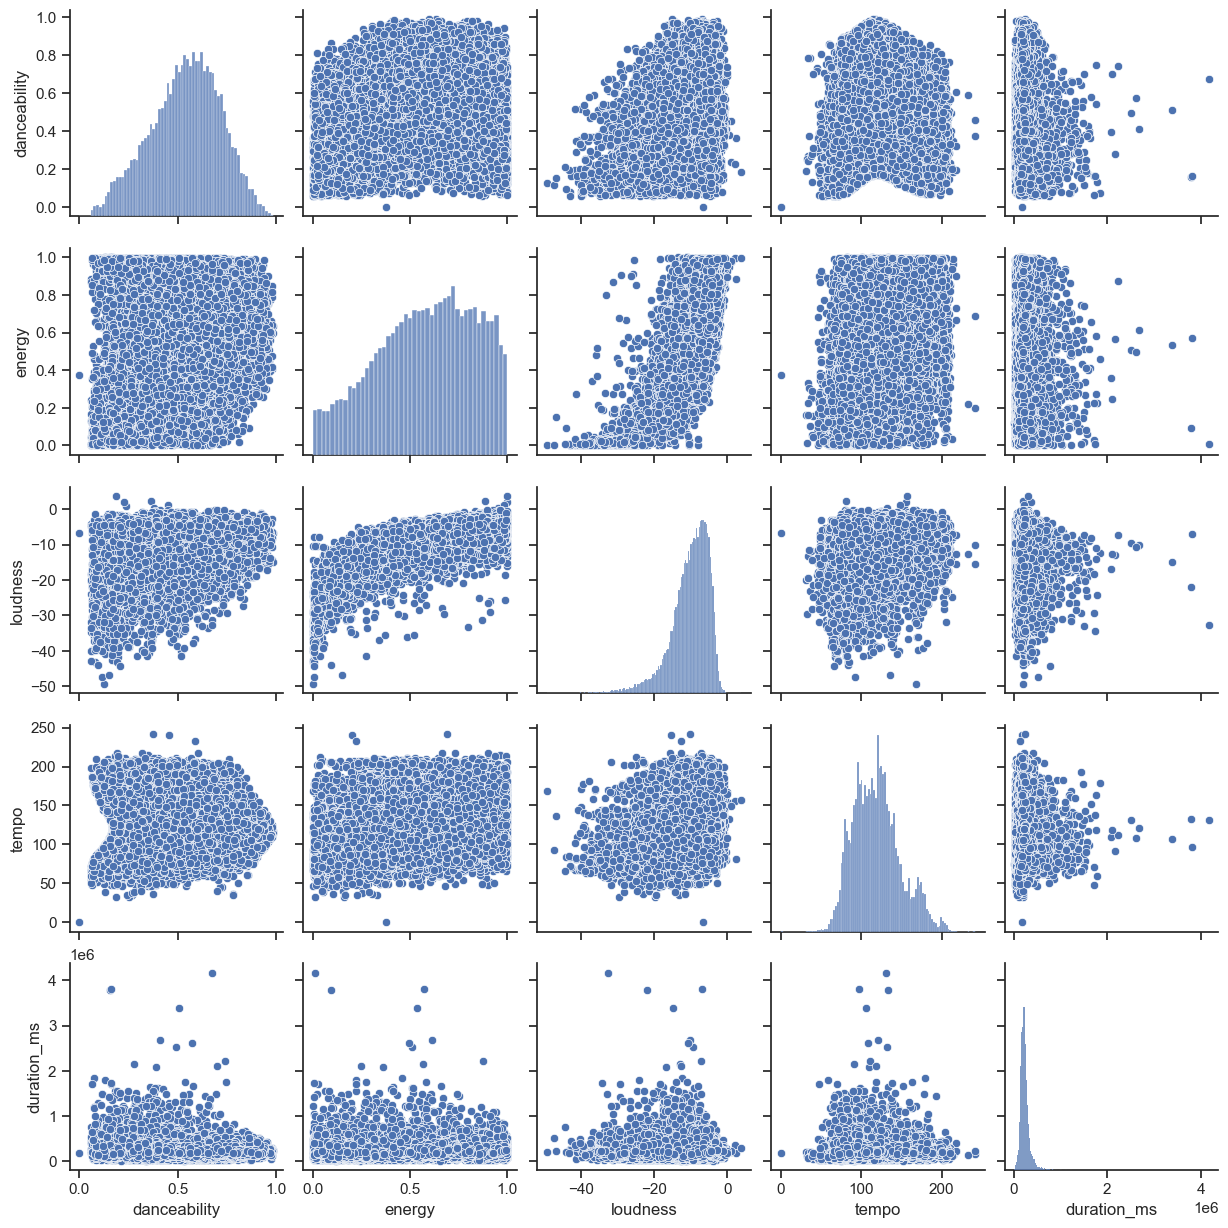

In [43]:
continuous_variables = ['danceability', 'energy', 'loudness', 'tempo', 'duration_ms']

sns.set(style='ticks')
sns.pairplot(data[continuous_variables])
plt.show()

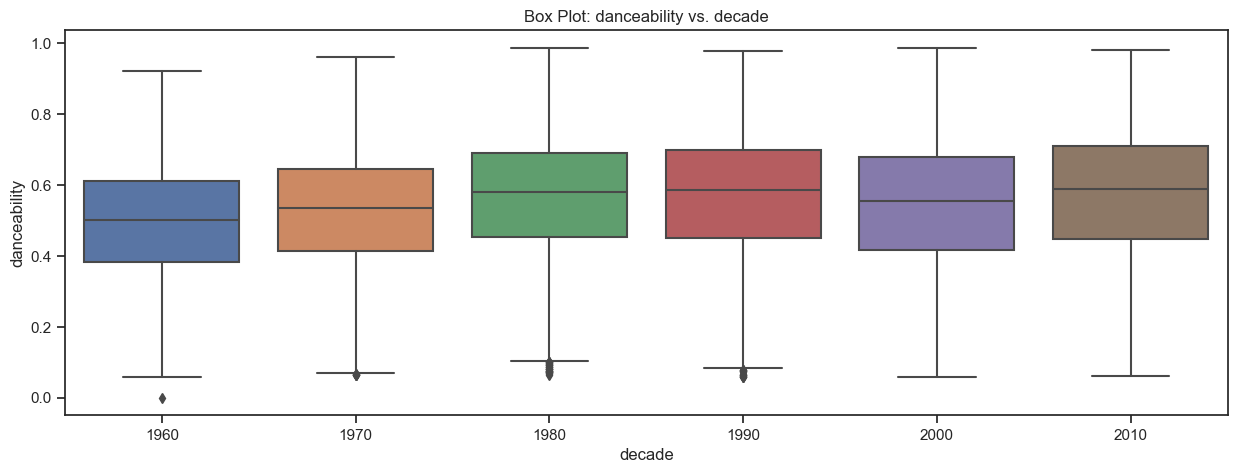

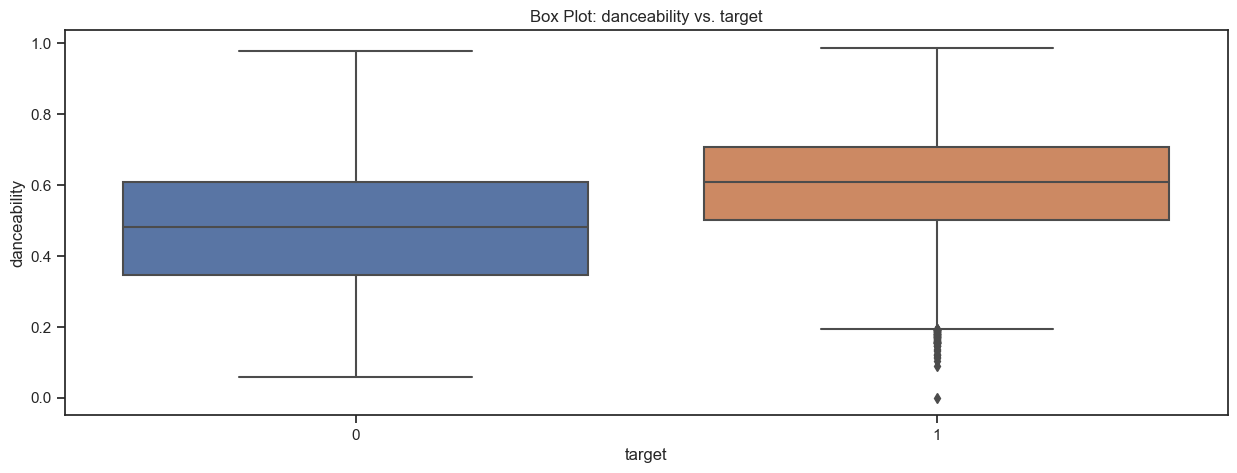

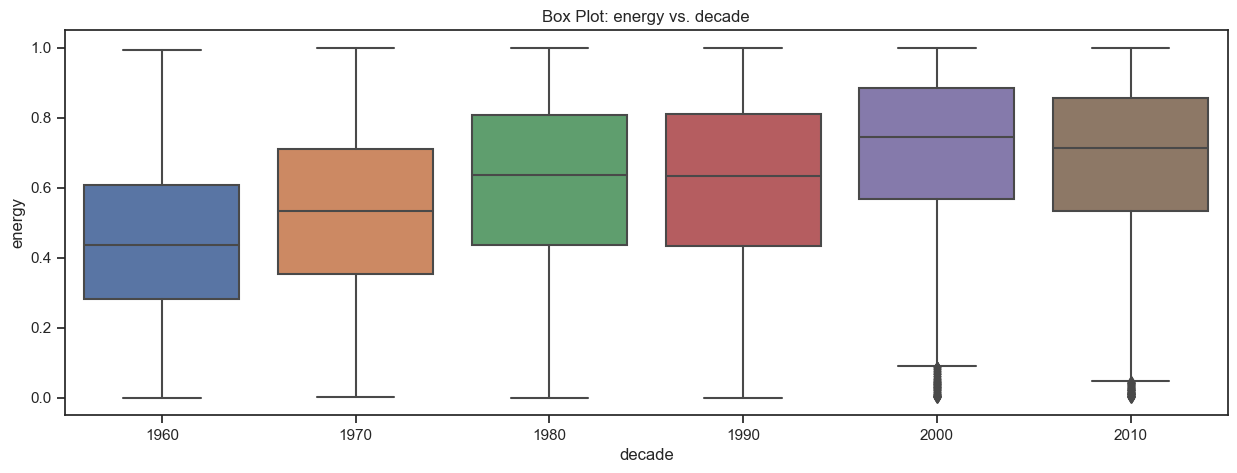

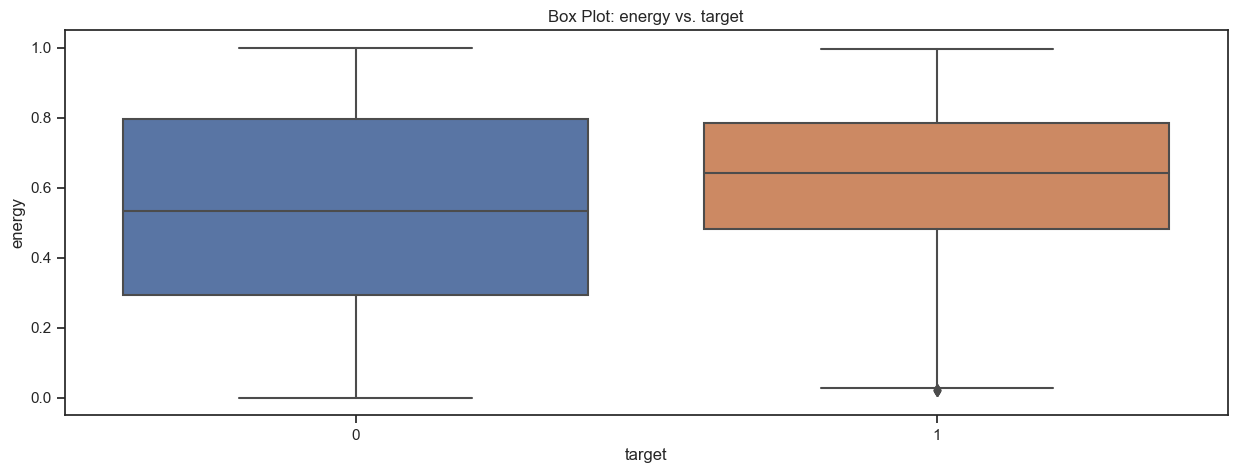

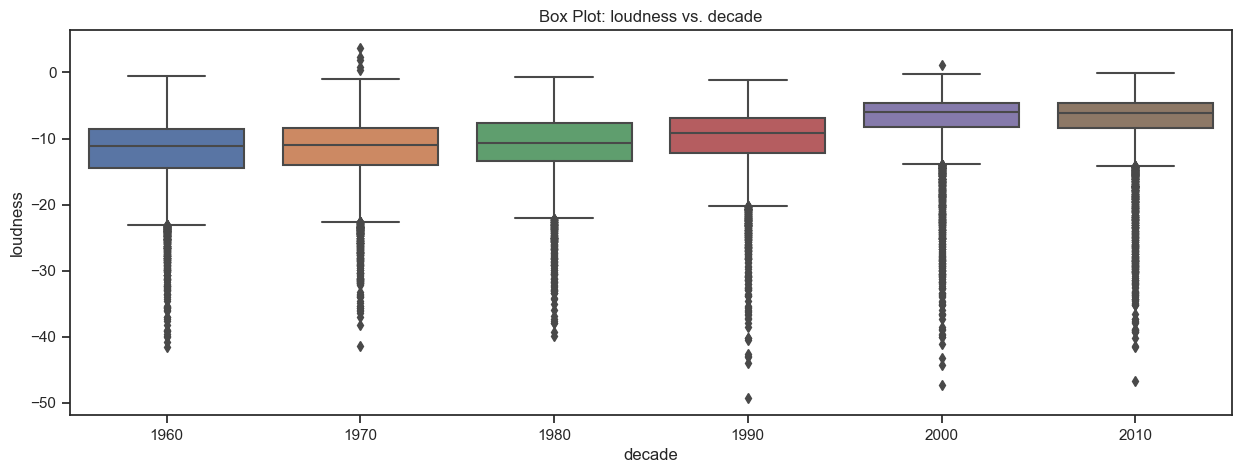

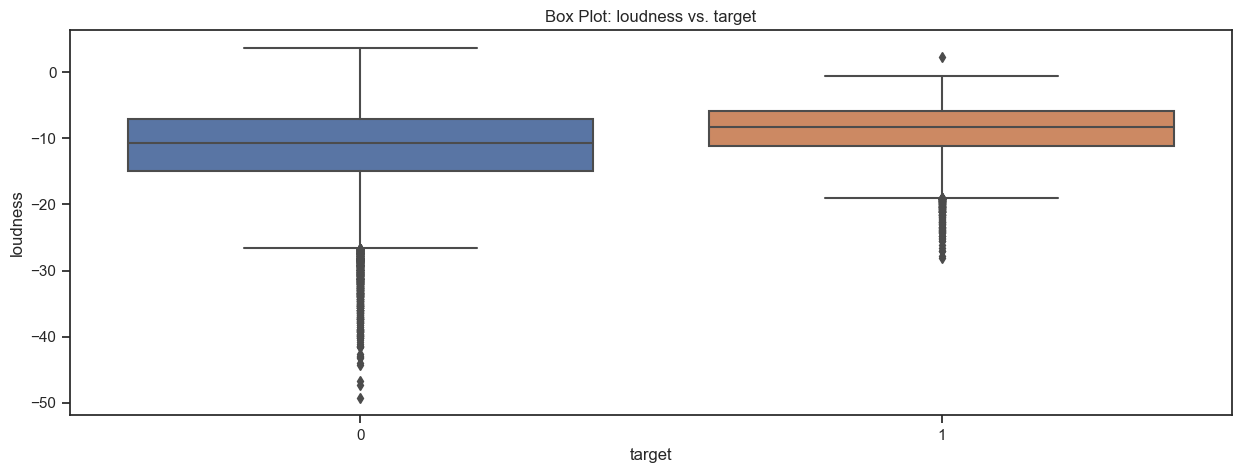

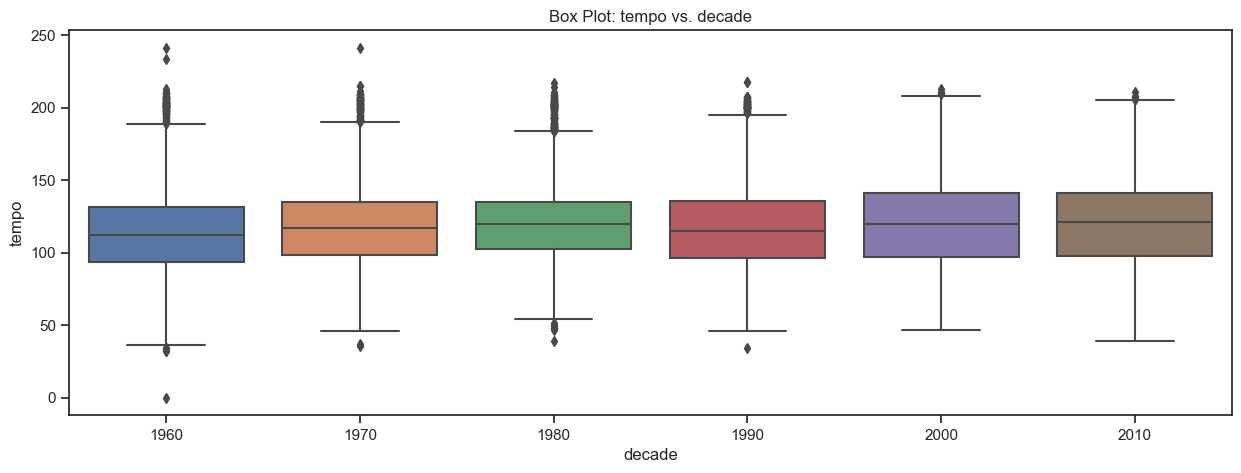

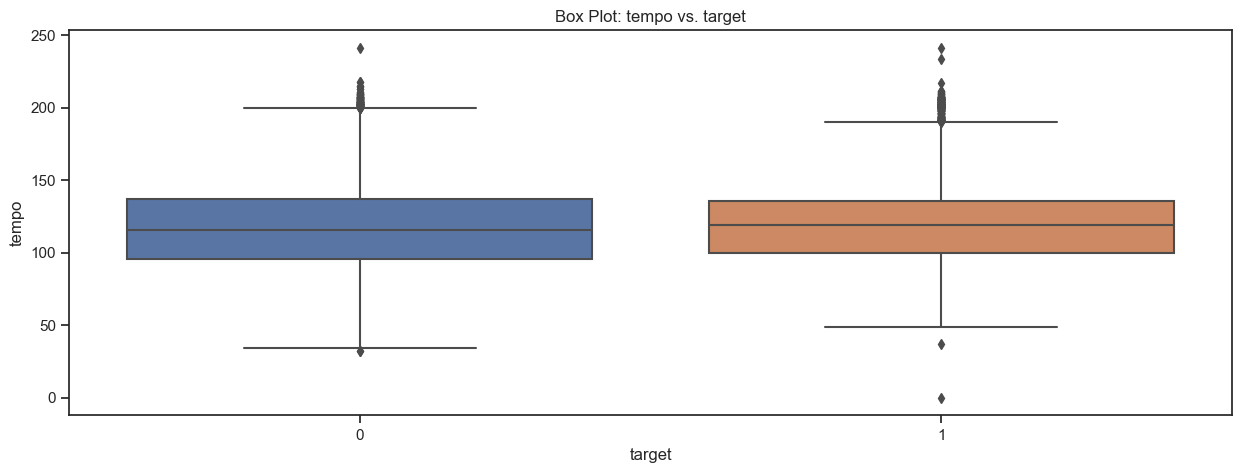

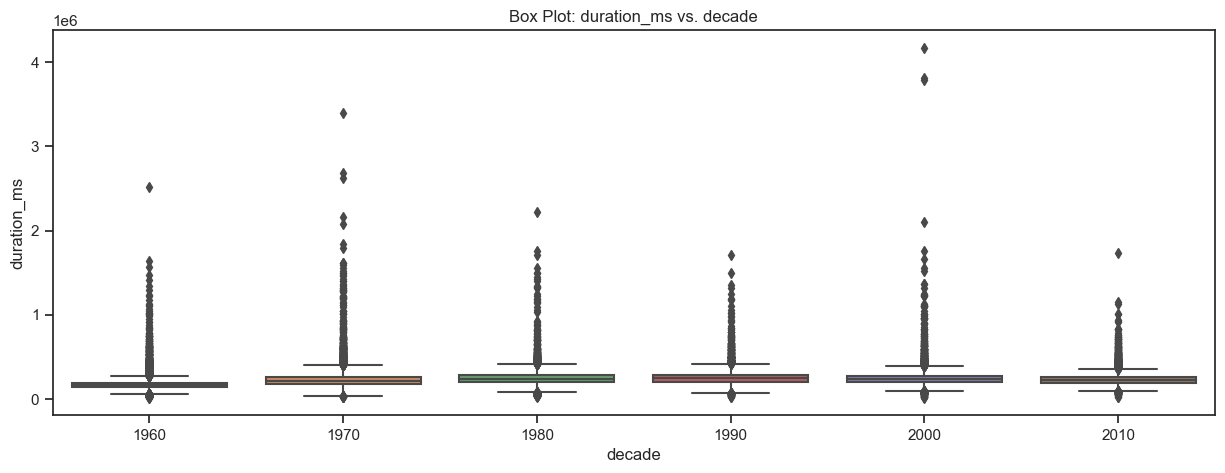

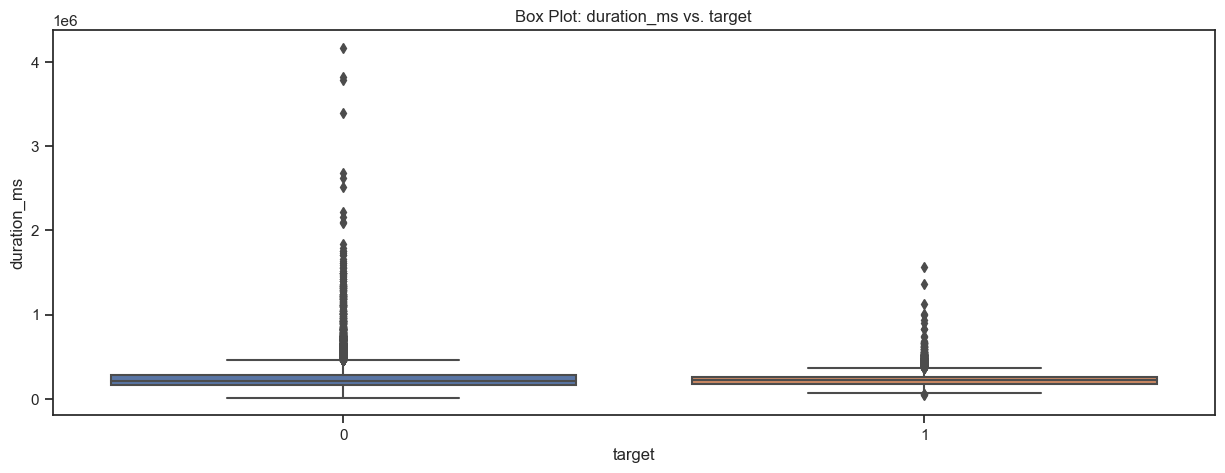

In [44]:
continuous_variables = ['danceability', 'energy', 'loudness', 'tempo', 'duration_ms']
categorical_variables = ['decade', 'target']

for column in continuous_variables:
    for cat_column in categorical_variables:
        sns.boxplot(x=cat_column, y=column, data=data)
        plt.xlabel(cat_column)
        plt.ylabel(column)
        plt.title(f'Box Plot: {column} vs. {cat_column}')
        plt.show()

In [45]:
X = data.drop('target', axis=1)
Y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [47]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      4067
           1       0.79      0.85      0.82      4155

    accuracy                           0.81      8222
   macro avg       0.81      0.81      0.81      8222
weighted avg       0.81      0.81      0.81      8222

Confusion Matrix:
[[3102  965]
 [ 605 3550]]


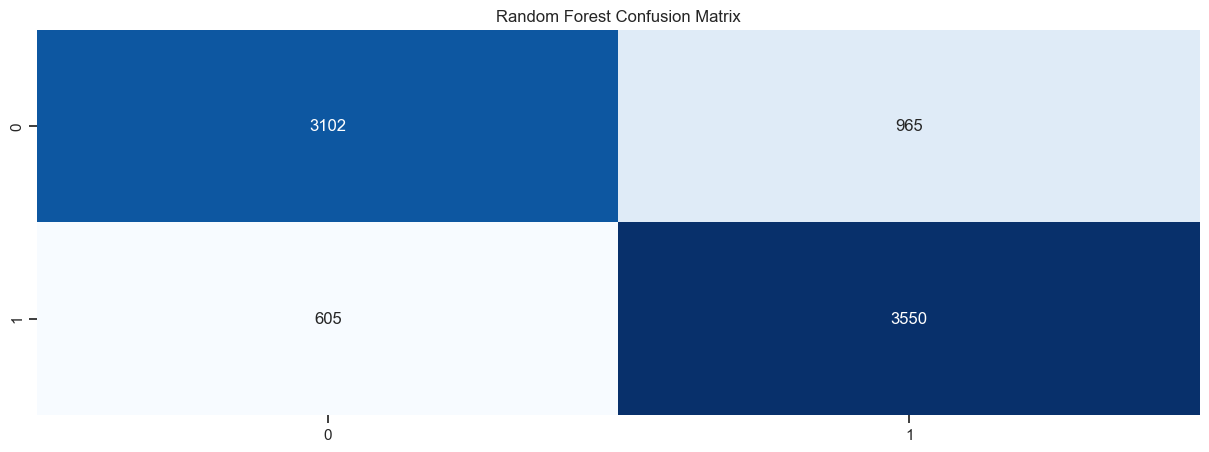

In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(rf, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.show()